# MAP536: Python for Data Science
## LAB 1: Intro to Python
### X/HEC - Data Science for Business

In [2]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from os import path
import urllib
import zipfile
import sys
import datetime
import time

# 1. Introduction to Python, Numpy, and Scipy

### 1. <br> From a word containing all the alphabet letters, generate with a string slicing the string _cfilorux_.

In [3]:
str = 'abcdefghijklmnopqrstuvwxyz'
str_slice_1=str[2:24:3]
print(str_slice_1)

cfilorux


### Do the same for the string _vxz_

In [4]:
str_slice_2 = str[21:26:2]
print(str_slice_2)

vxz


### 2. <br> Display the number $\pi$ with 9 digits

In [5]:
pi = np.pi
print("π to nine decimal places = {0:.9f}".format(pi))

π to nine decimal places = 3.141592654


### 3. <br> Count the number of occurrences of each character in the string s="HelLo WorLd!!" <br> Output a dictionary that for each character associate the number of occurrences.

In [6]:
test_str="HelLo WorLd"
dict = {i : test_str.count(i) for i in set(test_str)} 
print(dict)

{'d': 1, ' ': 1, 'W': 1, 'L': 2, 'e': 1, 'o': 2, 'l': 1, 'H': 1, 'r': 1}


### 4. <br> Write a function performing the Cesar cypher : each character is replaced by the third next one. Test it.

The cesar encryption can be represented using modular arithmetic following the scheme:

$ A \to 0,\ ...,\ Z \to 25 $

The encryption of a letter $x$ by a number $n=3$ is then given by:

$ E_n(x) = (x+3)\ mod\ 3$

In [7]:

str_in = 'abc'

def encrypt(text,s):
    result = ""

    for i in range(len(text)):
        char = text[i]

# UPPERCASE LETTERS (shift by ord('A') = 65)  
        if (char.isupper()):
            result += chr((ord(char) + s-65) % 26 + 65)
# lowercase letters (shift by ord('a') = 97)
        else:
            result += chr((ord(char) + s - 97) % 26 + 97)
    return result

str_out=encrypt('str_in',2)

### 5. Compute: $2\prod_{k=1}^{\inf}\frac{4k^2}{4k^2-1} \approx 2\prod_{k=1}^{n>>1}\frac{4k^2}{4k^2-1}$' <br>Use for instance _time_ to determine a faster version. Propose a faster version, using NumPy

In [8]:

start = time.time()
P_1=2
for i in range (1,1000):
    P_1 = (4*i**2)/(4*i**2-1)*P_1
end = time.time()

print(separator)
print('Using For Loops')
print('P:', P_1,'\n', 'time elapsed:', end-start)
print(separator)

start = time.time()

arr = np.arange(1,1000)
P_2 = 2* np.prod((4*arr**2)/(4*arr**2-1))

end = time.time()

print('Using NumPy')
print('P:', P_2,'\n', 'time elapsed:', end-start)
print(separator)

--------------------------------------------------
Using For Loops
P: 3.1408069608284657 
 time elapsed: 0.0035309791564941406
--------------------------------------------------
Using NumPy
P: 3.1408069608284657 
 time elapsed: 0.0003230571746826172
--------------------------------------------------


### 6. <br> Without using <font color=red>_for_</font> / <font color=red>_while_</font> loops, create a random matrix M $\in \mathbb{R}^{5\times 6} $ with coefficients taken uniformly <br> (and independently) in $[-1,1]$

In [9]:

M = np.random.uniform(-1,1,(5,6))

### Subtract to each even column of M, twice the value of the following (uneven) column. <br> Replace the negative values by 0 using a binary mask.

In [10]:
# SUBTRACT TWICE THE UNEVEN COLUMNS TO PREVIOUS EVEN ONES
M[:,1::2] = M[:,1::2] - 2*M[:,0::2]
M[M<0]=0

### 7. <br> Create a random matrix M $\in \mathbb{R}^{5\times 20} $ with coefficients taken uniformly (and independently) in $[-1,1]$.<br>Test whether $G = M^TM$ is symmetric (semi-) definite positive, and that its eigenvalues are positive. <br> What is the rank of G? Compute the Euclidean norm of G. Compute the $l_1$ norm of the columns of G.

In [11]:

M =np.random.uniform(-1,1,(5,20))

G = M.T @ M
G.shape
print(separator)
print('G symmetric:',np.array_equal(G,G.T))

#CHECK EIGENVALUES > 0
eigens = np.linalg.eigvalsh(G)
eigens[abs(eigens)<1e-13] = 0

eigens_pos = (eigens>0)
eigens_nonneg = (eigens>=0)
print(separator)
if all(eigens_pos):
    print('Eigenvalues of G are all positive.')
elif all(eigens_nonneg):
    print('Eigenvalues of G are all non negative.')
elif not all(eigens_nonneg):
    print('Eigenvalues of G are NOT all non negative.')

    
#   CHECK POSITIVE DEFINITENESS
def is_pos_def(A):
    if np.array_equal(A, A.T):
        try:
            np.linalg.cholesky(A)
            return True
        except np.linalg.LinAlgError:
            return False
    else:
        return False
def is_pos_sem_def(G):
    return np.array_equal(G,G.T) and all(eigens_nonneg)
print(separator)
print('G positive definite:', is_pos_def(G))
print('G positive semi-definite:', is_pos_sem_def(G))

# COMPUTE RANK
rank_G = np.linalg.matrix_rank(G)
print(separator)
print('Rank of G:', rank_G)


#  COMPUTE EUCLIDEAN NORM
G_2N = np.linalg.norm(G)
print(separator)
print('Euclidean norm of G:', G_2N)


#  COMPUTE L1 NORM
G_L1N = np.linalg.norm(G,1)
print('L1 norm of G:', G_2N)

--------------------------------------------------
G symmetric: True
--------------------------------------------------
Eigenvalues of G are all non negative.
--------------------------------------------------
G positive definite: False
G positive semi-definite: True
--------------------------------------------------
Rank of G: 5
--------------------------------------------------
Euclidean norm of G: 17.491576243774404
L1 norm of G: 17.491576243774404


### 8. <br> Use a list comprehension to construct a list with all squares from 1 to 121. Do the same using only numpy

In [12]:
list = [i**2 for i in np.arange(1,12)]
print('Squares in [1,121]:\n',list)

Squares in [1,121]:
 [1, 4, 9, 16, 25, 36, 49, 64, 81, 100, 121]


# 2. Introduction to Pandas, Matplotlib, etc.

### 9. <br>  First, execute the following commands to download the data <br> (this snippet is also in download_hpc.py on the Moodle if copy pasting fails) :

In [13]:
url = u'https://archive.ics.uci.edu/ml/machine-learning-databases/00235/'
filename = 'household_power_consumption'
zipfilename = filename + '.zip'
Location = url + zipfilename
if not(path.isfile('zipfilename')):
    urllib.request.urlretrieve(Location, zipfilename)
zip = zipfile.ZipFile(zipfilename)
zip.extractall()
na_values = ['?', '']
fields = ['Date', 'Time', 'Global_active_power']
df = pd.read_csv(filename + '.txt', sep=';', nrows=200000,
                 na_values=na_values, usecols=fields)

### 10. <br> Detect and count the number of line with missing values.

In [14]:
print('Number of NaN entries generated by resampling:', df.isnull().any(axis=1).sum())

Number of NaN entries generated by resampling: 3732


### 11. <br> Erase all such lines.

In [15]:
df=df.dropna()
print('Number of NaN entries after df.dropna:', df.isnull().any(axis=1).sum())

Number of NaN entries after df.dropna: 0


### 12. <br> Use to_datetime and set_index to create a Time Series <br> (beware of the international dates format that is different from the French standard).

In [16]:

TimeSeries = pd.to_datetime(df['Date'] + '-' + df['Time'], format = '%d/%m/%Y-%H:%M:%S')
df['TimeSeries'] = TimeSeries

df = df.set_index(['TimeSeries'])

df = df.resample('d').mean()

print('Number of NaN generated by resampling:', df.isnull().any(axis=1).sum())
df=df.dropna()

Number of NaN generated by resampling: 1


### 13. <br> Display the graphic of daily averages, between January 1 2007 and April 30 2007. <br> Propose an explanation for the consumption behavior between February and early April. <br> On top of _matplotlib_ you could use the _seaborn_ package for nicer display

/anaconda3/lib/python3.7/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


<function matplotlib.pyplot.show(*args, **kw)>

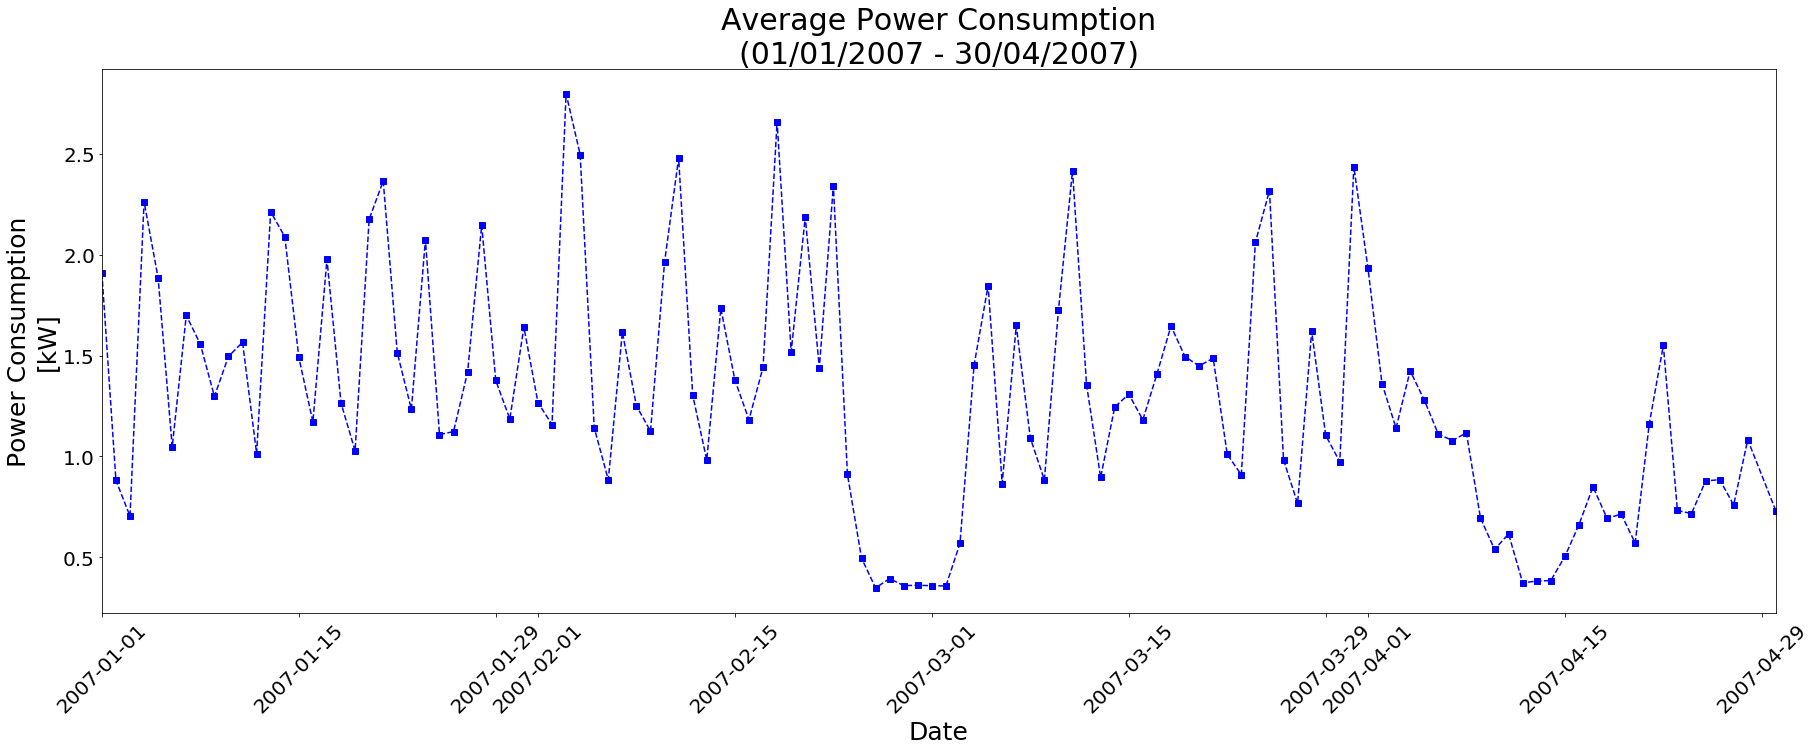

In [17]:

df_jan_to_apr = df.loc['2007-01-01':'2007-04-30',:]

plt.figure(figsize=(30,10))
plt.plot(df_jan_to_apr,'bs--')
plt.title('Average Power Consumption\n(01/01/2007 - 30/04/2007)',fontsize = 30)
plt.xlabel('Date',fontsize = 25)
plt.xlim('2007-01-01','2007-04-30')
plt.ylabel('Power Consumption\n[kW]', fontsize = 25)
plt.tick_params(axis='x', labelsize=20, rotation = 45)
plt.tick_params(axis='y', labelsize=20)
plt.show

### 14. <br> Load the dataset with _pandas_, and keep only the DATE and TG columns. <br> Divide by 10 the TG column to get Celsius temperature. Treat missing values as NaNs.

In [18]:
df_temps = pd.read_csv('TG_STAID011249' + '.txt', na_values=na_values, skiprows = 21, 
                       usecols = [2,3] , names = ['DATE' , 'TG'])

In [19]:
df_temps['TG'] = df_temps['TG']/10

TimeSeries = pd.to_datetime(df_temps['DATE'], format = '%Y%m%d')
df_temps['DATE'] = TimeSeries
df_temps = df_temps.set_index(['DATE'])


# Extract entries between 01/01/2007 and 30/04/2007
df_temps_jan_to_apr = df_temps.loc['2007-01-01':'2007-04-30',:]

### 15. <br> Create a pandas Time Series with the daily temperatures between January 1 2007 and April 30 2007. <br> Display on the same graph the temperature and the Global_active_power Time Series.

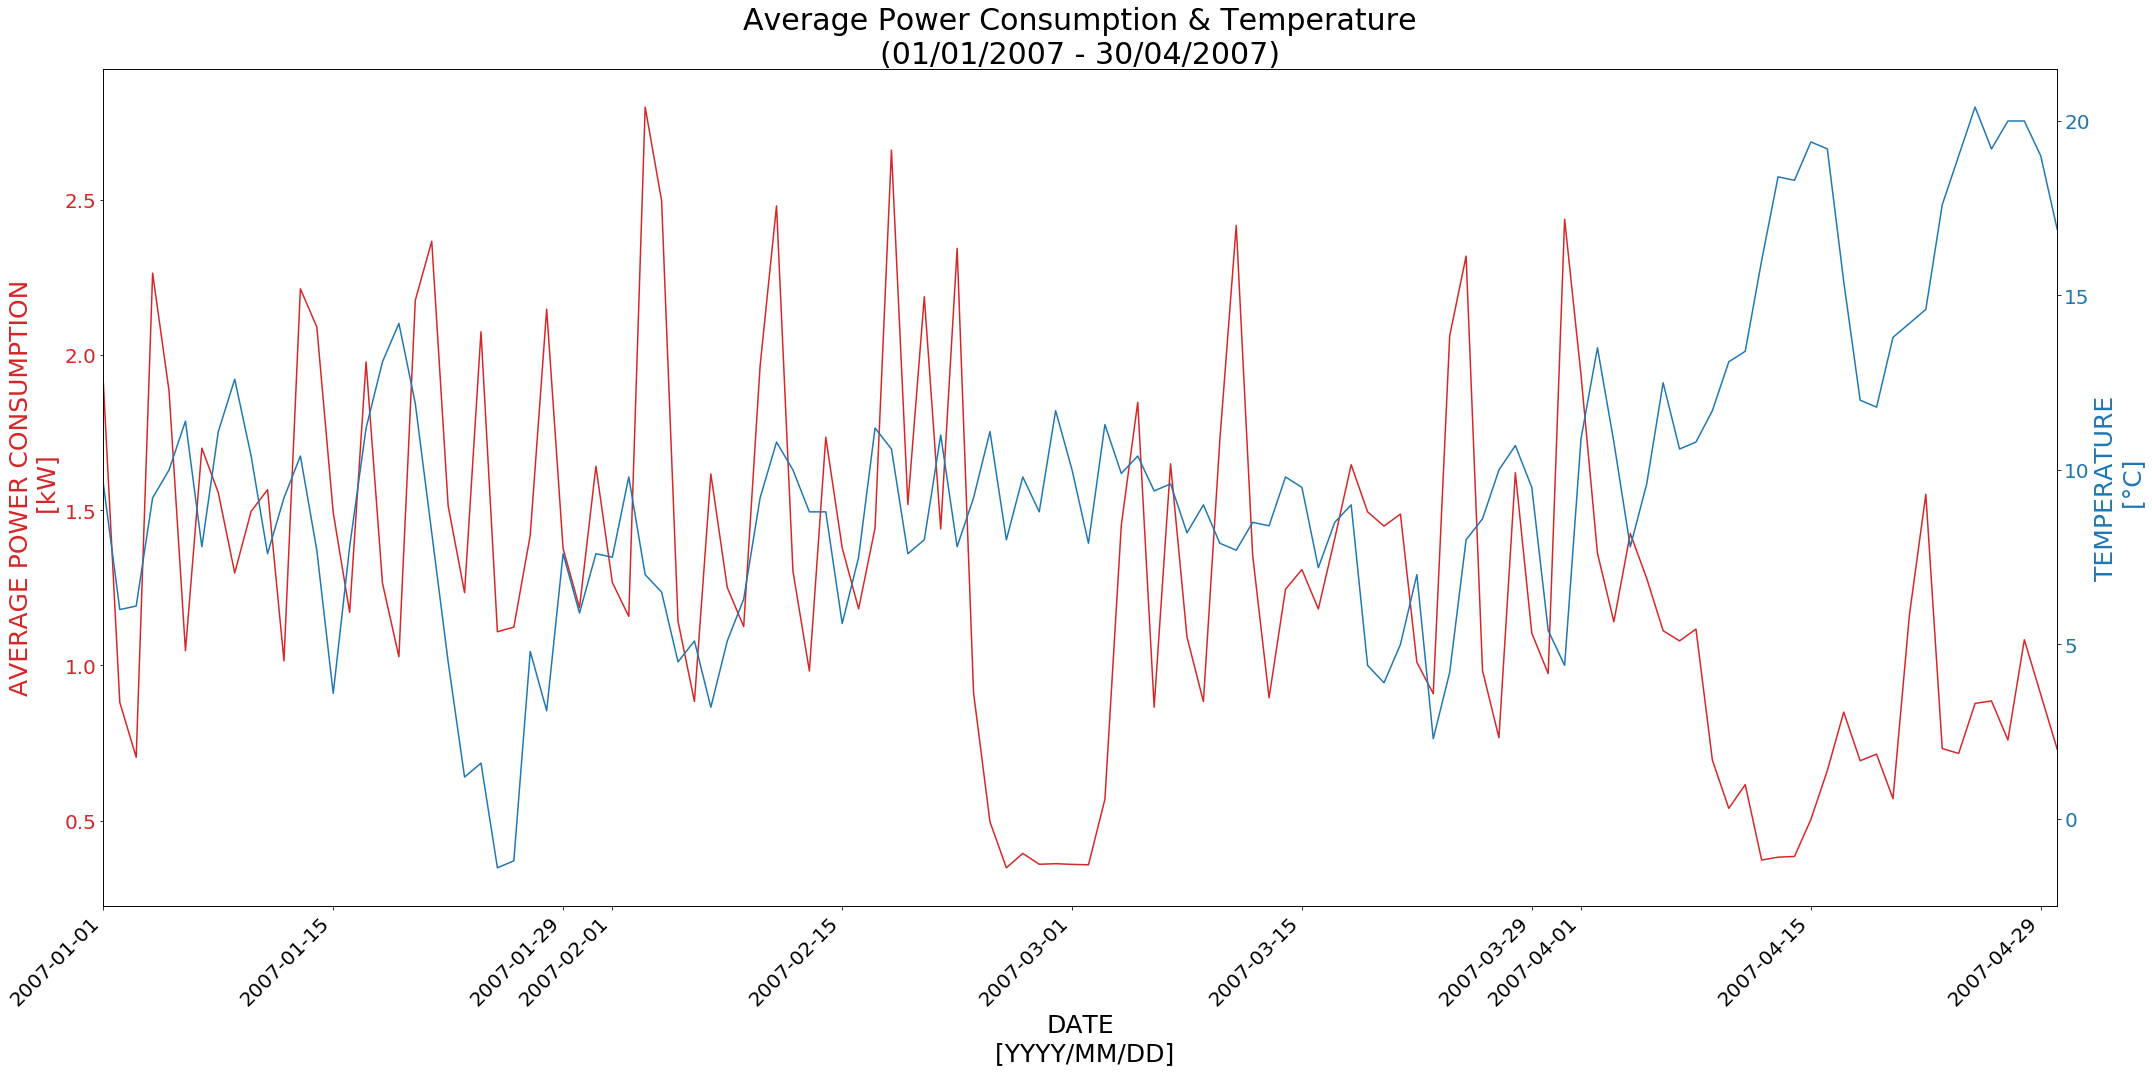

In [28]:
data1 = df_jan_to_apr
data2 = df_temps_jan_to_apr

fig_1, fig_1 = plt.subplots(figsize = (30,15))
plt.title('Average Power Consumption & Temperature\n(01/01/2007 - 30/04/2007)',fontsize = 30)
color = 'tab:red'
fig_1.set_xlabel('DATE\n [YYYY/MM/DD]', fontsize = 25)
fig_1.tick_params(axis='x', labelsize=20, rotation = 30)
fig_1.set_ylabel('AVERAGE POWER CONSUMPTION\n [kW]', color=color, fontsize = 25)
fig_1.plot(data1, color=color)
fig_1.tick_params(axis='y', labelcolor=color, labelsize=20)

fig_2 = fig_1.twinx()

color = 'tab:blue'
fig_2.set_ylabel('TEMPERATURE\n [°C]', color=color, fontsize = 25)  # we already handled the x-label with ax1
fig_2.plot(data2, color=color)
fig_2.tick_params(axis='y', labelcolor=color, labelsize=20)
plt.xlim('2007-01-01','2007-04-30')
plt.setp( fig_1.xaxis.get_majorticklabels(), rotation=45, ha="right" )

plt.tight_layout()
plt.show()

We observe the power consumption and temperature readings are somewhat negatively correlated, as decreasing temperatures are followed by a sharp increase in power consumption.

During the last week of february 2007, power consumption readings remain low regardless of the temperature. One explanation for this outlier may be related to winter break, as people tend to travel away for the week, which explains the low power consumption readings.